In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split

In [29]:
# Preprocessing Function
def preprocess_image(img,target_size=(28,28)):
    img = cv2.imread(img)   # reading image with open-cv (BGR not RGB)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)     # change the colour into gray 
    img = cv2.resize(img,target_size)   # resize image from (300,300) into (28,28)
    img = img.astype(np.float32) / 255.0    # rescale the image 
    
    return img

In [30]:
#load_images
def load_images(Date_dir):
    X_data = []
    y_data = []

    zero = 'fresh'
    one = 'rotten'

    for label in os.listdir(Data_dir):
        dir = os.path.join(Data_dir,label)
        for img_file in os.listdir(dir):
            img_path = os.path.join(dir,img_file)
            img = preprocess_image(img_path)
            X_data.append(img)
            if label == 'rotten' or label == 'rotten_aug':
                y_data.append(one)
            else:
                y_data.append(zero)

    X_data = np.array(X_data)
    y_data = np.array(y_data)
    
    return X_data,y_data

In [31]:
Data_dir = '../Datasets/rotten or not Dataset'
X_data, y_data = load_images(Data_dir)

In [32]:
print(X_data.shape)
print(y_data.shape)

(3177, 28, 28, 3)
(3177,)


In [33]:
#shuffle data
shuffle_indices = np.random.permutation(len(X_data))
X_data = X_data[shuffle_indices]
y_data = y_data[shuffle_indices]


In [11]:
y_data

array(['fresh', 'rotten', 'fresh', ..., 'fresh', 'rotten', 'rotten'],
      dtype='<U6')

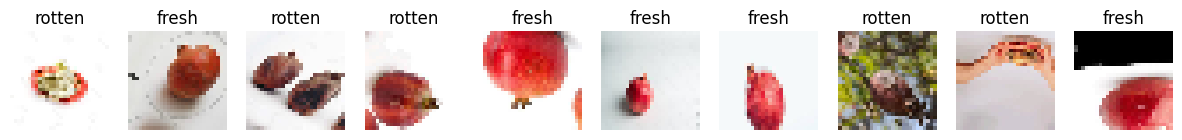

In [34]:
no_of_images = 10
fig,axes = plt.subplots(1,no_of_images,figsize=(15,8))
for i in range(no_of_images):
    axes[i].imshow(X_data[i])
    axes[i].axis('off')
    axes[i].set_title(y_data[i])

plt.show()

In [35]:
#encoding label: fresh->0, rotten->1
from sklearn.preprocessing import LabelEncoder

labels = ['Fresh','Rotten']
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)
y_data

array([1, 0, 1, ..., 0, 1, 0])

In [36]:
#splitting data
X,X_test,y,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=42)

In [37]:
#splittind training data into train and validation
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
print(f'x_train:{X_train.shape}')
print(f'x_val:{X_val.shape}')
print(f'x_test:{X_test.shape}')


x_train:(2032, 28, 28, 3)
x_val:(509, 28, 28, 3)
x_test:(636, 28, 28, 3)


In [101]:
# Building model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense,BatchNormalization,Dropout

input_shape = (28,28,3)
no_of_classes = 2

model = Sequential()
model.add(Flatten(input_shape = input_shape))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(no_of_classes,activation='sigmoid'))

In [102]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [103]:
history = model.fit(X_train,y_train,
          epochs=100,
          batch_size=12,
          validation_data=(X_val,y_val)
          )

Epoch 1/100
 58/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5339 - loss: 1.0808

W0000 00:00:1713900861.538693      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5591 - loss: 0.8950

W0000 00:00:1713900864.559872      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5593 - loss: 0.8942 - val_accuracy: 0.4892 - val_loss: 0.7061
Epoch 2/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6177 - loss: 0.6649 - val_accuracy: 0.5894 - val_loss: 0.6695
Epoch 3/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6751 - loss: 0.6238 - val_accuracy: 0.7446 - val_loss: 0.5355
Epoch 4/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7237 - loss: 0.5549 - val_accuracy: 0.6523 - val_loss: 0.6464
Epoch 5/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7163 - loss: 0.5953 - val_accuracy: 0.7859 - val_loss: 0.5007
Epoch 6/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7549 - loss: 0.5053 - val_accuracy: 0.8173 - val_loss: 0.4369
Epoch 7/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7727 - loss: 0.4742 - val_accuracy: 0.6405 - val_loss: 0.8789
Epoch 8/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7469 - loss: 0.5537 - val_accuracy: 0.831

In [104]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1024)           │     2,409,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,320,648 (35.56 MB)

 Trainable params: 3,106,882 (11.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,213,766 (23.70 MB)

In [106]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f'test_loss:{test_loss}')
print(f'test_accuracy:{test_accuracy}')


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.3440 
test_loss:0.38981515169143677
test_accuracy:0.8663522005081177


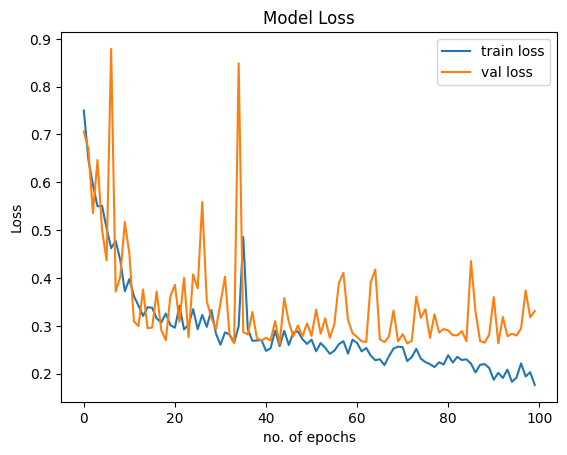

In [112]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('Model Loss')
plt.xlabel('no. of epochs')
plt.ylabel('Loss')
plt.savefig('model_loss.png')
plt.legend()
plt.show()

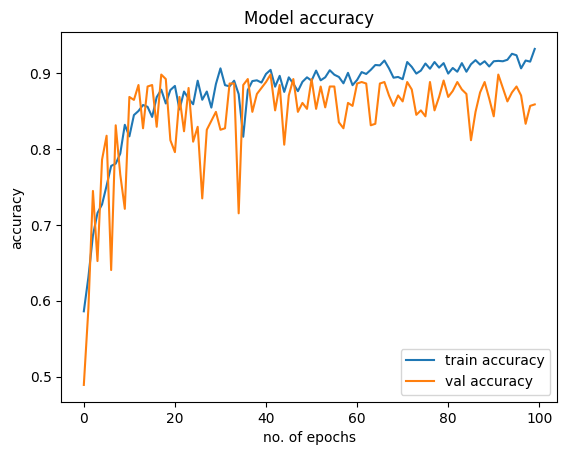

In [111]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('Model accuracy')
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')
plt.savefig('model_accuracy.png')
plt.legend()
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


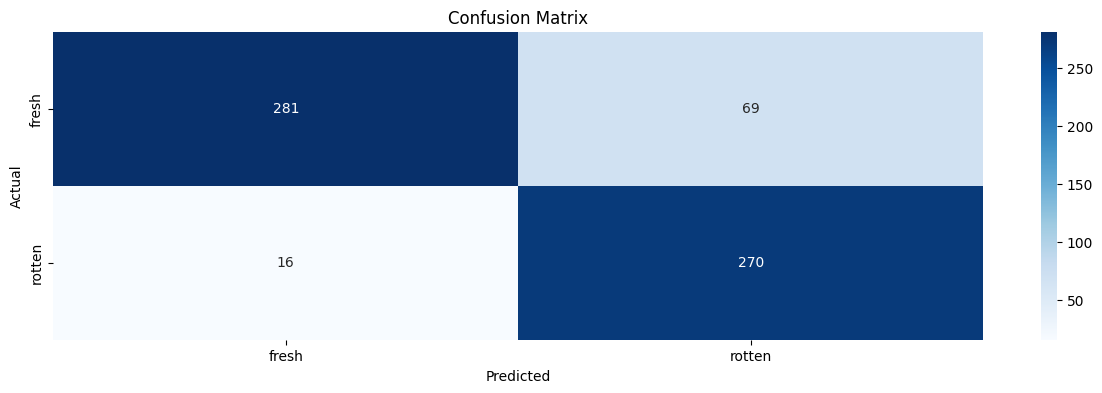

In [110]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()


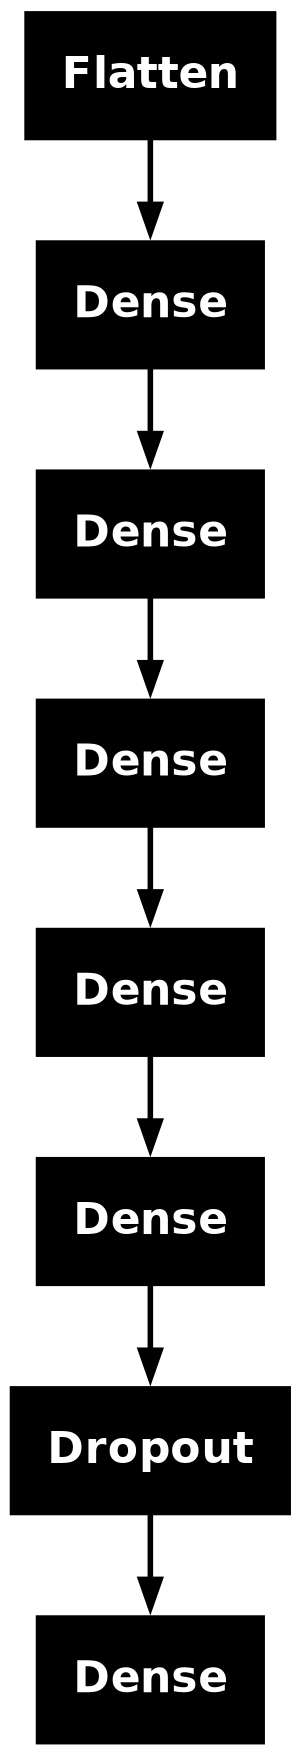

In [113]:
# Model Architecture
from keras.utils import plot_model
from keras.models import load_model
plot_model(model, to_file='model_architecture.png', show_shapes=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


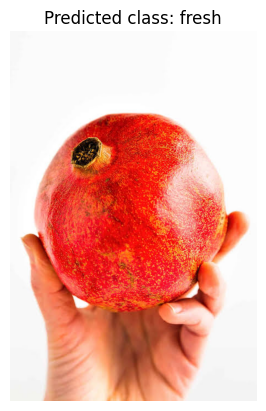

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


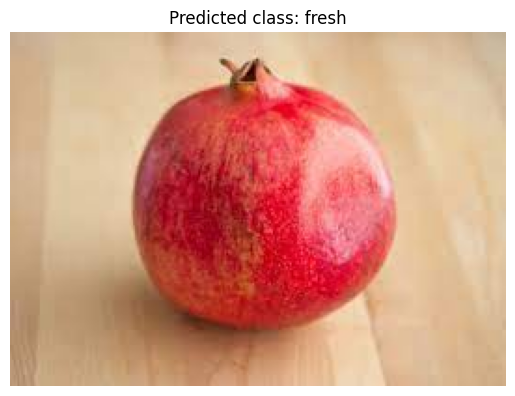

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


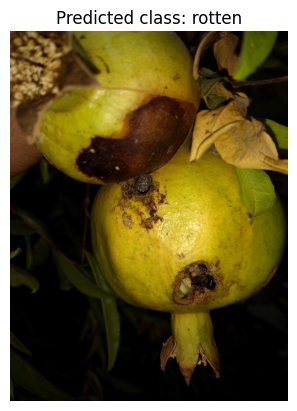

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


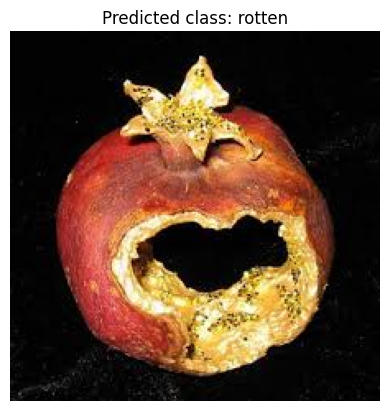

In [114]:
import matplotlib.image as mpimg

labels = ['fresh','rotten']

imgs_paths = ['./testing/image.jpeg','./testing/image1.jpeg','./testing/rotten.jpg','./testing/rotten2.jpeg']
for img_path in imgs_paths:
    img_plt = mpimg.imread(img_path)
    img = preprocess_image(img_path)
    arr = []
    arr.append(img)
    arr = np.array(arr)
    pred = model.predict(arr)
    pred = np.argmax(pred)
    
    #plotting image
    plt.imshow(img_plt)
    plt.title(f'Predicted class: {labels[pred]}')
    plt.axis('off')
    plt.show()